In [2]:
"""
Python code for plotting chi-square values for different parameter combinations
"""
import numpy as np 
import math
import scipy.spatial as spatial
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.ndimage as sp

#open file and create float arrays
f=open('Chisq_values_omega_3.txt', "r")
lines=f.readlines()

chisq = []
h = []
mass = []
omega = []

for k in lines:
        chisq.append(k.split(  )[0])   
        h.append(k.split(  )[2]) 
        mass.append(k.split(  )[1]) 
        omega.append(k.split(  )[3])
        
        
f.close()
mass = np.array(mass).astype(np.float)
chisq = np.array(chisq).astype(np.float)
h= np.array(h).astype(np.float)
omega= np.array(omega).astype(np.float)



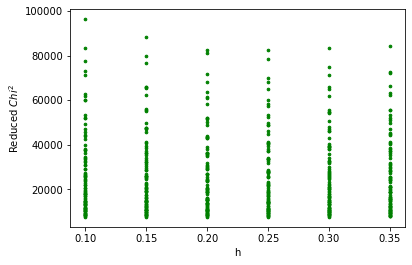

In [4]:
#use to plot single variable chisquare to detrmine shape
mask = chisq <= 15000000 
fig, ax = plt.subplots()
ax.scatter(omega, chisq, s = 7, color = 'green')
ax.set_xlabel('h')
ax.set_ylabel('Reduced $ Chi^{2}$')
#plt.axhline(np.min(chisq) + 1)
#plt.axis([0.49, 0.87, 9000, 35000])

plt.show()

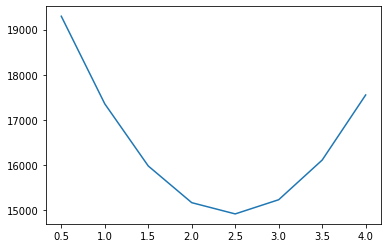

In [5]:
#use to fit curve of singel variable chisquare
mask = chisq <= 30000
from scipy import optimize
def func(x, A, B,C):
    return A*x**2 + B*x +C

fig, ax = plt.subplots()
popt, pcov = optimize.curve_fit(func, mass[mask], chisq[mask])
ax.plot(np.sort(mass[mask]), func(np.sort(mass[mask]), *popt))


Text(0.5, 0, 'chisq ($h^{-1} Mpc$)')

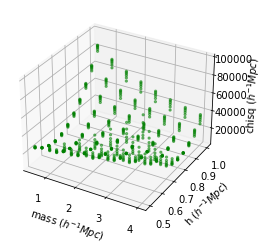

In [6]:
#plot 2-d combinations 
mask = chisq < 20000
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.scatter(mass, h, (chisq), s =5, alpha = 0.5, color = 'green')
ax.set_ylabel('h ($h^{-1} Mpc$)')
ax.set_xlabel('mass ($h^{-1} Mpc$)')
ax.set_zlabel('chisq ($h^{-1} Mpc$)')

In [8]:
#find likelihood from a given chisquare value
prob_dist = np.ones(len(chisq))
for k in range(len(chisq)):
    
    prob = np.exp(-chisq[k]/25104)
    prob_dist[k] *= prob
    
prob_levels = np.ones(len(levels))
for k in range(len(levels)):
    
    prob = np.exp(-levels[k]/2)
    prob_levels[k] *= prob
    

Text(0, 0.5, '$\\Delta M$$(M_{halo})$')

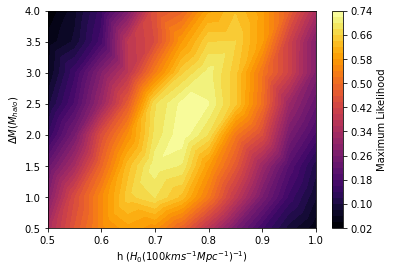

In [13]:
#plot 2-d likelihood
X, Y = np.meshgrid(h,mass)
Z = chisq
fig,ax=plt.subplots(1,1)
plt.tricontourf(h, mass, prob_dist, levels = 40, cmap = 'inferno')
cbar=plt.colorbar(label =('Maximum Likelihood'))
#sigma = plt.tricontour(h, mass, prob_dist, [0.68], cmap = 'jet')
plt.clabel(sigma,[0.68])
plt.xlabel('h ($H_{0} (100 kms^{-1}Mpc^{-1})^{-1}$)')
plt.ylabel('$\Delta M$$(M_{halo})$')
#plt.axis([0.5,0.95,0.5,3.7])


[]

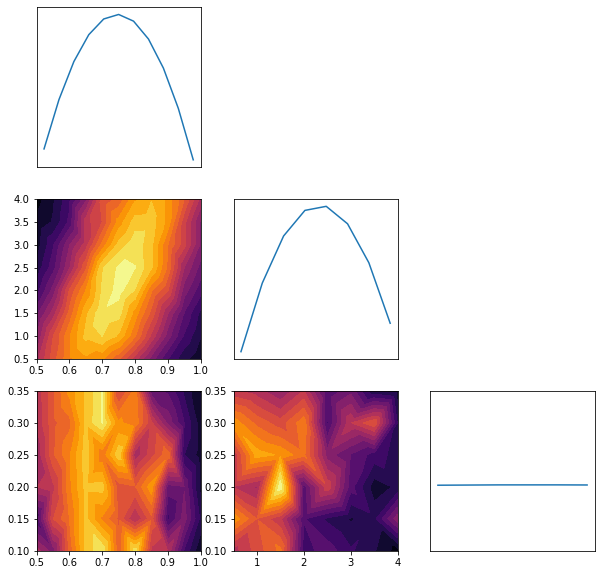

In [96]:
#plotting different combiantions of variables as a triangle style plot
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(figsize=(10, 10), sharex=False, sharey=False, ncols=3, nrows=3)
ax2.axis('off')
ax3.axis('off')
ax6.axis('off')
popt, pcov = optimize.curve_fit(func, h, prob_dist)
ax1.plot(np.sort(h), func(np.sort(h), *popt))
ax1.set_xticks([])
ax1.set_yticks([])
ax4.tricontourf(h, mass, prob_dist, levels = 20, cmap = 'inferno')
popt, pcov = optimize.curve_fit(func, mass, prob_dist)
ax5.plot(np.sort(mass), func(np.sort(mass), *popt))
ax5.set_ylim(0, 1)
ax5.set_xticks([])
ax5.set_yticks([])
ax7.tricontourf(h, omega, prob_dist, levels = 20, cmap = 'inferno')
ax8.tricontourf(mass, omega, prob_dist, levels = 20, cmap = 'inferno')
popt, pcov = optimize.curve_fit(func, omega, prob_dist)
ax9.plot((omega), func((omega), *popt))
ax9.set_ylim(0, 1)
#ax9.scatter(np.sort(omega), prob_dist)
ax9.set_xticks([])
ax9.set_yticks([])

In [3]:
print(np.min(chisq))

7678.152968888939
